Atividade Prática do Módulo 4

O objetivo desse exercício é classificar imagens através do uso de rede neural. Vamos treinar um modelo de rede neural para classificação de imagens de roupas.

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_img, train_labels),(test_img, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


As imagens são arrays de 28 x 28
Os labels são arrays de inteiros com valores de 0 a 9:


0 - Camisetas

1 - Calça

2 - Suéter

3 - Vestidos

4 - Casaco

5 - Sandálias

6 - Camisa

7 - Tenis

8 - Bolsa

9 - Botas

In [13]:
#criando as classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

Exploração dos dados

In [4]:
train_img.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_img.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

Pré-Processamento de dados

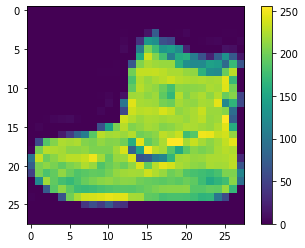

In [9]:
#Inspecionando a primeira imagem do conjunto de treinamento
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#transformando os valores de pixels entre 0 e 1
train_img = train_img/255
test_img = test_img/255

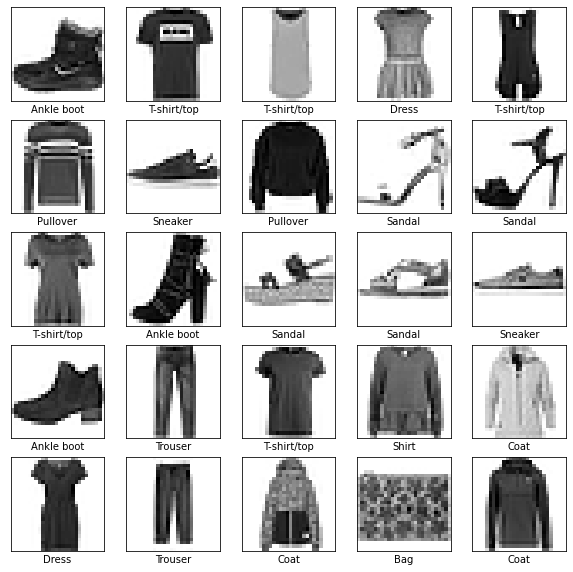

In [14]:
#verificando a transformação nas primeiras 25 linhas
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i],cmap=plt.cm.binary)
  plt.xlabel(classes[train_labels[i]])
plt.show()

Construindo o modelo 

Rede Neural

In [15]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

In [19]:
#configurações do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#treinando o modelo
model.fit(train_img,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4933 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3109 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2799 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2589 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2476 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [21]:
#avaliando as métricas 
test_loss,test_acc=model.evaluate(test_img,test_labels,verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3374 - accuracy: 0.8858

Test accuracy:  0.8858000040054321


In [22]:
predictions = model.predict(test_img)

In [23]:
predictions[0]

array([7.1821410e-07, 3.2314038e-10, 6.8948196e-08, 4.3373314e-09,
       4.1297412e-07, 2.0752904e-04, 1.7349632e-07, 5.8096696e-02,
       1.6010836e-06, 9.4169283e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [32]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                       100*np.max(predictions_array),
                                       classes[true_label]),
                                       color=color)
  
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

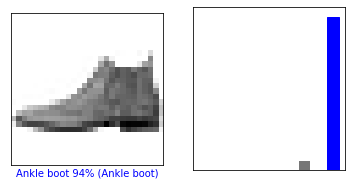

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_img)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

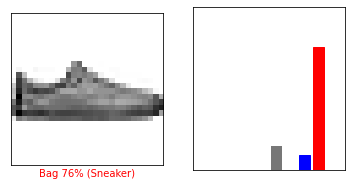

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_img)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

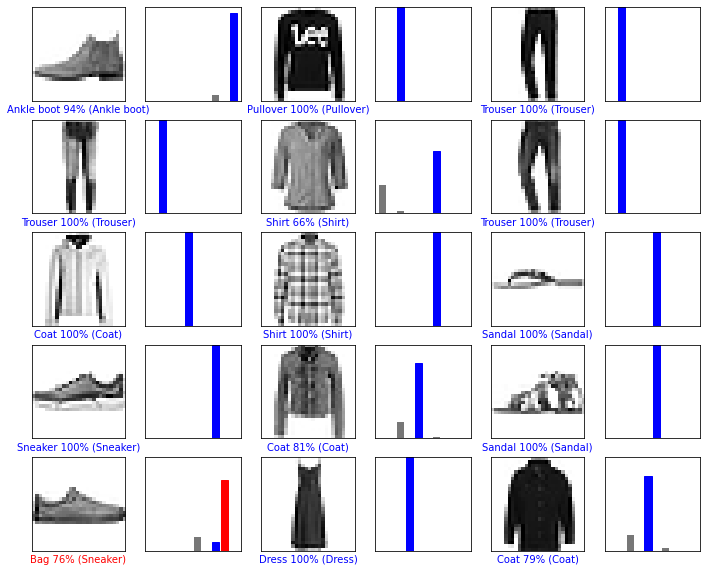

In [35]:
#plotando as primeiras imagens de teste e suas labels preditas
#As previsões corretas estão em azul e as incorretas em vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_labels,test_img)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_labels)
plt.show()

In [37]:
img = test_img[0]
print(img.shape)

(28, 28)


In [38]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [39]:
predictions_single = model.predict(img)
print(predictions_single)

[[7.1821552e-07 3.2314165e-10 6.8948061e-08 4.3373314e-09 4.1297528e-07
  2.0752884e-04 1.7349664e-07 5.8096722e-02 1.6010836e-06 9.4169283e-01]]


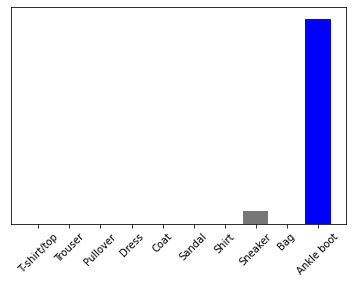

In [41]:
plot_value_array(0,predictions_single,test_labels) 
_= plt.xticks(range(10),classes,rotation=45)

In [42]:
np.argmax(predictions_single[0])

9